## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
from keras.layers import BatchNormalization, Activation

os.environ["CUDA_VISIBLE_DEVICES"] = "0, 1"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], pre_active=False):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(n_units, name="hidden_layer"+str(i))(input_layer)
            if pre_active:
                x = BatchNormalization()(x)
                x = Activation('relu')(x)
            else:
                x = Activation('relu')(x)
                x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(n_units, name="hidden_layer"+str(i))(x)
            if pre_active:
                x = BatchNormalization()(x)
                x = Activation('relu')(x)
            else:
                x = Activation('relu')(x)
                x = BatchNormalization()(x)
    out = keras.layers.Dense(output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
BATCH_SIZE = 2, 16, 32, 128, 256
EPOCHS = 10
LEARNING_RATE = 1e-3
MOMENTUM = 0.95
PRE_ACTIVE=[True, False]

In [11]:
list(itertools.product(BATCH_SIZE, PRE_ACTIVE))

[(2, True),
 (2, False),
 (16, True),
 (16, False),
 (32, True),
 (32, False),
 (128, True),
 (128, False),
 (256, True),
 (256, False)]

In [12]:
results = {}
for i, (bs,cond) in enumerate(itertools.product(BATCH_SIZE, PRE_ACTIVE)):

    model = build_mlp(input_shape=x_train.shape[1:], pre_active=cond)
    model.summary()
    opt = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
    model.fit(x_train, y_train, batch_size=bs, epochs=EPOCHS, validation_data=(x_test, y_test), shuffle=True)

    name = "bs-%s-pre-%s" %(str(bs), str(cond))
    results[name] = {
        'train_loss': model.history.history['loss'],
        'val_loss': model.history.history['val_loss'],
        'train_acc': model.history.history['accuracy'],
        'val_acc': model.history.history['val_accuracy']
    }

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0   

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 24s 487us/step - loss: 1.7158 - accuracy: 0.3876 - val_loss: 1.6490 - val_accuracy: 0.4076
Epoch 2/10
50000/50000 [==============================] - 24s 477us/step - loss: 1.5197 - accuracy: 0.4613 - val_loss: 1.6086 - val_accuracy: 0.4146
Epoch 3/10
50000/50000 [==============================] - 24s 477us/step - loss: 1.4312 - accuracy: 0.4912 - val_loss: 1.4801 - val_accuracy: 0.4788
Epoch 4/10
50000/50000 [==============================] - 24s 477us/step - loss: 1.3677 - accuracy: 0.5139 - val_loss: 1.5223 - val_accuracy: 0.4647
Epoch 5/10
50000/50000 [==============================] - 24s 479us/step - loss: 1.3209 - accuracy: 0.5307 - val_loss: 1.4267 - val_accuracy: 0.4946
Epoch 6/10
50000/50000 [==============================] - 24s 477us/step - loss: 1.2743 - accuracy: 0.5484 - val_loss: 1.4521 - val_accuracy: 0.4895
Epoch 7/10
50000/50000 [==============================] 

50000/50000 [==============================] - 12s 250us/step - loss: 0.9412 - accuracy: 0.6671 - val_loss: 1.5522 - val_accuracy: 0.4835
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
activation_22 (Activation)   (None, 512)               0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               131328    
_________________________________________________________________
activation_23 (Activation)   (None, 256)             

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 102us/step - loss: 1.7682 - accuracy: 0.3845 - val_loss: 1.7059 - val_accuracy: 0.3921
Epoch 2/10
50000/50000 [==============================] - 5s 92us/step - loss: 1.5015 - accuracy: 0.4706 - val_loss: 1.5868 - val_accuracy: 0.4448
Epoch 3/10
50000/50000 [==============================] - 5s 93us/step - loss: 1.3970 - accuracy: 0.5072 - val_loss: 1.5679 - val_accuracy: 0.4499
Epoch 4/10
50000/50000 [==============================] - 5s 93us/step - loss: 1.3265 - accuracy: 0.5338 - val_loss: 1.5336 - val_accuracy: 0.4597
Epoch 5/10
50000/50000 [==============================] - 5s 93us/step - loss: 1.2659 - accuracy: 0.5543 - val_loss: 1.4970 - val_accuracy: 0.4695
Epoch 6/10
50000/50000 [==============================] - 5s 93us/step - loss: 1.2172 - accuracy: 0.5718 - val_loss: 1.4977 - val_accuracy: 0.4717
Epoch 7/10
50000/50000 [==============================] - 5s 93us/s

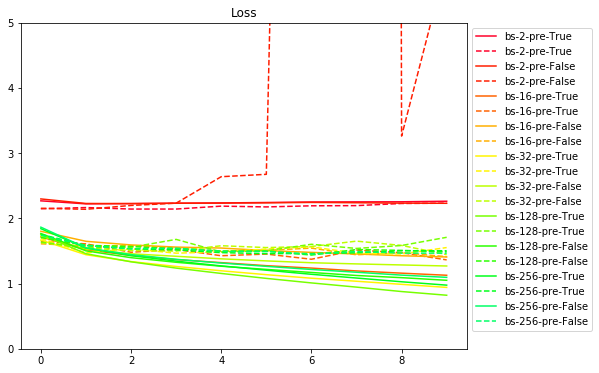

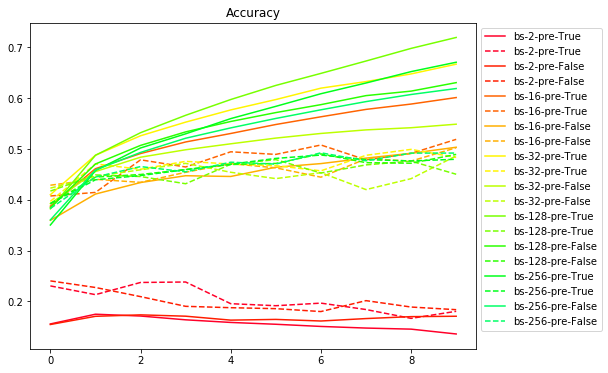

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]


plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_loss'])),results[cond]['val_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_acc'])),results[cond]['val_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()